## Read 2pt for test

In [1]:
import numpy as np
import gvar as gv

from lametlat.utils.plot_settings import *
from lametlat.preprocess.read_raw import pt2_to_meff, pt2_to_meff_solve
from lametlat.utils.resampling import bootstrap, bs_ls_avg
from lametlat.gsfit.Lanczos.t_matrix import T_Matrix, cut_spurious
from lametlat.utils.constants import *
from lametlat.utils.funcs import constant_fit

a = 0.04
pt2_data = np.loadtxt("data/c2pt.CG52bxp00_CG52bxp00.SS.meson_g15.PX0_PY0_PZ0.real", delimiter=',')
print(np.shape(pt2_data))
pt2_data = pt2_data.swapaxes(0, 1)[1:] # remove the first row, which is the time
pt2_bs, _ = bootstrap(pt2_data, samp_times=50, bin=10)
print(np.shape(pt2_bs))

(64, 315)
(50, 64)


0.30087(64)


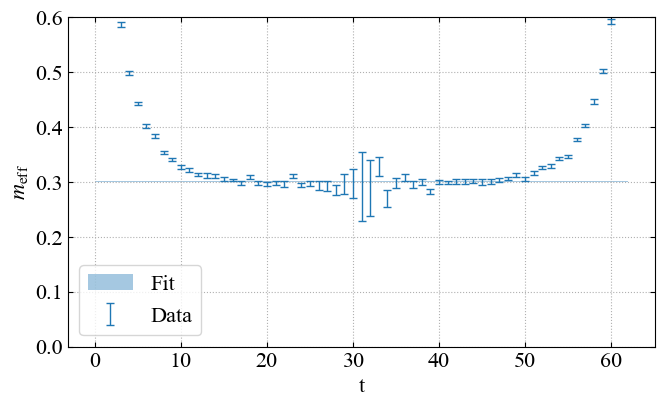

In [2]:
meff_bs = [pt2_to_meff_solve(pt2_bs[i], boundary="periodic") for i in range(len(pt2_bs))]
meff_avg = bs_ls_avg(meff_bs) * GEV_FM / a

# Clean NaN values in meff_avg
meff_avg = np.array([x if not np.isnan(x.mean) else gv.gvar(0, 10) for x in meff_avg])

fit_res = constant_fit(meff_avg[15:30])

print(fit_res)

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff_avg)), gv.mean(meff_avg), yerr=gv.sdev(meff_avg), label='Data', **errorb)
ax.fill_between(np.arange(len(meff_avg)), gv.mean(fit_res) - gv.sdev(fit_res), gv.mean(fit_res) + gv.sdev(fit_res), alpha=0.4, label='Fit')
ax.set_xlabel('t', **fs_p)
ax.set_ylabel(r'$m_{\rm eff}$', **fs_p)
plt.ylim(0., 0.6)
plt.legend(**fs_p)
plt.tight_layout()
plt.show()

In [3]:
n_conf = 0
m = 4
pt2_norm = pt2_bs[n_conf] / pt2_bs[n_conf][0]

t_matrix_class = T_Matrix(pt2_norm, m=4)
t_matrix = t_matrix_class.main(ifcheck=True)

>>> check the alpha 2 from the t-matrix:  (0.36049754494220937+0j)
>>> check the alpha 2 from the pt2:  0.36049754494220976


[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0.j 0.55539149+0.j]
[0.01229181+0.j 0.55539149+0.j]
[0.01229181+0.j 0.93207907+0

/tmp/ipykernel_2748114/3931274021.py:23: RuntimeWarning: invalid value encountered in log
  energy_states = - GEV_FM / a * np.log( eigenvalues )


[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.03965566+0.j  0.34548885+0.j  0.82334495+0.j  1.00119458+0.j]
[-0.039655

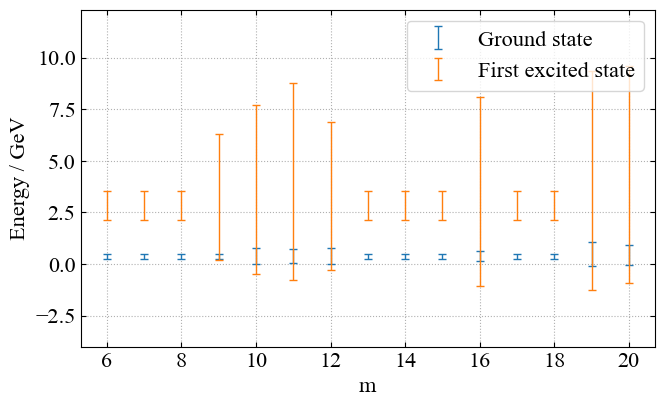

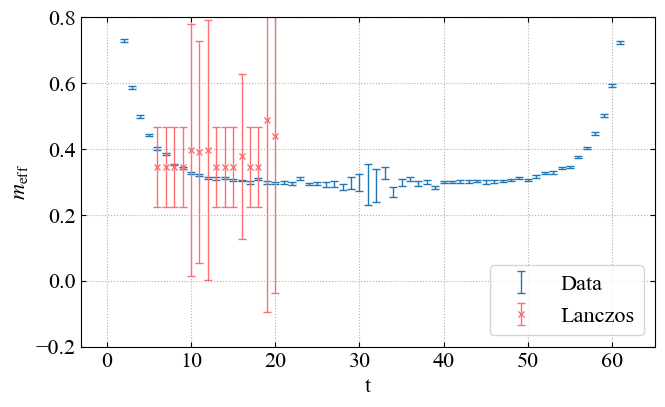

>>> Ground state energy:  [0.34492384 0.34518817 0.34518817 0.34518817 0.39675717 0.39043955
 0.39834317 0.34518817 0.34518817 0.34518817 0.37774794 0.34518817
 0.34518817 0.48761894 0.43908794]


In [8]:

m_ls = np.arange(6, 32)
e0_ls, e1_ls = [], []

for n_conf in range(len(pt2_bs)):
    pt2_norm = pt2_bs[n_conf] / pt2_bs[n_conf][0]
    
    temp_e0, temp_e1 = [], []
    for m in m_ls:
        t_matrix_class = T_Matrix(pt2_norm, m=m)
        t_matrix = t_matrix_class.main(ifcheck=False)
        
        if np.isnan(t_matrix).any():
            print(f"NaN detected in t_matrix for m={m} and n_conf={n_conf}")
            print(t_matrix)
            
        
        # Calculate eigenvalues of the t_matrix
        eigenvalues = cut_spurious(t_matrix, tolerance=0.01)
        # Select eigenvalues with imaginary part smaller than threshold
        print(eigenvalues)
        eigenvalues = eigenvalues[np.abs(eigenvalues.imag) < 1e-15].real
        # Calculate energy states
        energy_states = - GEV_FM / a * np.log( eigenvalues )
        energy_states = np.array([e for e in energy_states if not np.isnan(e) and e > 0])
        energy_states = np.sort(energy_states)
        
        if len(energy_states) > 1:
            temp_e0.append(energy_states[0])
            temp_e1.append(energy_states[1])

    if len(temp_e0) > 0 and len(temp_e1) > 0:
        e0_ls.append(temp_e0[:15])
        e1_ls.append(temp_e1[:15])

print(np.shape(e0_ls))
print(np.shape(e1_ls))

e0_gv = bs_ls_avg(e0_ls)
e1_gv = bs_ls_avg(e1_ls)

fig, ax = default_plot()
ax.errorbar(m_ls[:15], gv.mean(e0_gv), yerr=gv.sdev(e0_gv), label='Ground state', **errorb)
ax.errorbar(m_ls[:15], gv.mean(e1_gv), yerr=gv.sdev(e1_gv), label='First excited state', **errorb)
ax.set_xlabel('m', **fs_p)
ax.set_ylabel('Energy / GeV', **fs_p)
ax.set_ylim(auto_ylim([gv.mean(e0_gv), gv.mean(e1_gv)], [gv.sdev(e0_gv), gv.sdev(e1_gv)]))
plt.legend(loc='upper right', **fs_p)
plt.tight_layout()
plt.show()


fig, ax = default_plot()
ax.errorbar(np.arange(len(meff_avg)), gv.mean(meff_avg), yerr=gv.sdev(meff_avg), label='Data', **errorb)
ax.errorbar(m_ls[:15], gv.mean(e0_gv), yerr=gv.sdev(e0_gv), label='Lanczos', marker='x', color=red, **errorb)
ax.set_xlabel('t', **fs_p)
ax.set_ylabel(r'$m_{\rm eff}$', **fs_p)
plt.ylim(-0.2, 0.8)
plt.legend(**fs_p)
plt.tight_layout()
plt.show()

print(">>> Ground state energy: ", gv.mean(e0_gv))


In [5]:
print(np.mean(e0_ls))
print(e0_ls)

0.3645167769823411
[[0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048, 0.346987782024048], [0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206, 0.32717082491262206], [0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904, 0.9589105273151904], [0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364, 0.30461070370445364], 